In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# dataset

In [54]:
switch_people_atc2nd_diff_drug = pd.read_csv(
    "output_switch/switch_people_freq_atc2nd_diff_drug.tsv", sep="\t"
)

In [73]:
switch_people_atc1st_diff_drug = pd.read_csv(
    "output_switch/switch_people_freq_atc1st_diff_drug.tsv", sep="\t"
)

In [57]:
switch_people_diff_drug = pd.read_csv(
    "output_switch/switch_people_freq_diff_drug.tsv", sep="\t"
)

In [63]:
switch_people_diff_drug

,A_drug_concept_id,A_atc_codes,A_drug_concept_name,B_drug_concept_id,B_atc_codes,B_drug_concept_name,people_count,avg_switch_interval
0,1201620,"('R05DA04',)",codeine,1125315,"('N02BE01',)",acetaminophen,24995,79.469902
1,1125315,"('N02BE01',)",acetaminophen,1201620,"('R05DA04',)",codeine,24034,79.639427
2,1713332,"('J01CA04',)",amoxicillin,1125315,"('N02BE01',)",acetaminophen,21076,110.321770
3,1125315,"('N02BE01',)",acetaminophen,1713332,"('J01CA04',)",amoxicillin,19953,114.550373
4,1177480,"('C01EB16', 'G02CC01', 'M01AE01', 'M02AA13', '...",ibuprofen,1125315,"('N02BE01',)",acetaminophen,15971,97.900242
...,...,...,...,...,...,...,...,...
441561,1354860,"('C01BC04',)",flecainide,19101454,(),Unknown,1,38.000000
441562,1354860,"('C01BC04',)",flecainide,19124906,(),Unknown,1,12.000000
441563,1354860,"('C01BC04',)",flecainide,40166035,"('A10BH03',)",saxagliptin,1,47.000000
441564,1354860,"('C01BC04',)",flecainide,42903865,(),Unknown,1,35.000000


# chi2 test

In [58]:
def switch_chi2_test(df, drug_a_id, drug_b_id):
    """
    Perform chi-square test for drug switch
    Note that df should not contain siwtches between the same drug, or else the test result can be invalid or misleading
    """

    count_a_to_b = df[
        (df["A_drug_concept_id"] == drug_a_id) & (df["B_drug_concept_id"] == drug_b_id)
    ]["people_count"].sum()
    count_a_to_other = df[
        (df["A_drug_concept_id"] == drug_a_id) & (df["B_drug_concept_id"] != drug_b_id)
    ]["people_count"].sum()
    count_other_to_b = df[
        (df["A_drug_concept_id"] != drug_a_id) & (df["B_drug_concept_id"] == drug_b_id)
    ]["people_count"].sum()
    count_other_to_other = df[
        (df["A_drug_concept_id"] != drug_a_id) & (df["B_drug_concept_id"] != drug_b_id)
    ]["people_count"].sum()

    contingency_table = [
        [count_a_to_b, count_a_to_other],
        [count_other_to_b, count_other_to_other],
    ]

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    contributions = (contingency_table - expected) ** 2 / expected  # type: ignore

    return chi2, p, dof, expected, contingency_table, contributions

In [79]:
switch_chi2_test(switch_people_diff_drug, 791967, 1125315)

Chi-square statistic: 0.0006660695033738469
P-value: 0.9794102237725767
Degrees of freedom: 1
Expected frequencies:
[[1.82157643e+02 5.22184236e+03]
 [6.74507842e+05 1.93358542e+07]]
Observed frequencies:
[[np.int64(183), np.int64(5221)], [np.int64(674507), np.int64(19335855)]]
contribution to chi2:
[[3.89533530e-03 1.35884052e-04]
 [1.05197457e-06 3.66968583e-08]]


In [91]:
switch_chi2_test(switch_people_atc1st_diff_drug, 791967, 1125315)

(np.float64(902.8927688311168),
 np.float64(2.3065807777903347e-198),
 1,
 array([[2.72401731e+01, 1.36175983e+03],
        [9.37917598e+04, 4.68873124e+06]]),
 [[np.int64(183), np.int64(1206)], [np.int64(93636), np.int64(4688887)]],
 array([[8.90637647e+02, 1.78160078e+01],
        [2.58670098e-01, 5.17434727e-03]]))

In [89]:
chi2, p, dof, expected, contingency_table, contributions = switch_chi2_test(
    switch_people_diff_drug, 791967, 1125315
)
print("chi2: ", chi2)
print("p-value: ", p)
print("degrees of freedom: ", dof)
print("expected: ", expected)
print("observed: ", contingency_table)
print("chi2 contributions: ", contributions)

chi2:  0.0006660695033738469
p-value:  0.9794102237725767
degrees of freedom:  1
expected:  [[1.82157643e+02 5.22184236e+03]
 [6.74507842e+05 1.93358542e+07]]
observed:  [[np.int64(183), np.int64(5221)], [np.int64(674507), np.int64(19335855)]]
chi2 contributions:  [[3.89533530e-03 1.35884052e-04]
 [1.05197457e-06 3.66968583e-08]]


# chi2 result (self switch included)

In [62]:
switch_people_atc2nd = pd.read_csv(
    "output_switch/switch_people_freq_atc2nd.tsv", sep="\t"
)
switch_people = pd.read_csv("output_switch/switch_people_freq.tsv", sep="\t")

In [ ]:
# the result with the dataset that exclude self switch
# 749	1125315	('N02BE01',)	acetaminophen	1786621	('J01DB01',)	cephalexin	2620	75.97322225528117	0.832152117335328 (p-value)

In [69]:
chi2, p, dof, expected, contingency_table, contributions = switch_chi2_test(
    switch_people, 1125315, 1786621
)
print("chi2: ", chi2)
print("p-value: ", p)
print("degrees of freedom: ", dof)
print("expected: ", expected)
print("observed: ", contingency_table)
print("chi2 contributions: ", contributions)

chi2:  3.3771982869395334
p-value:  0.06610433753258033
degrees of freedom:  1
expected:  [[2.71448548e+03 6.92681515e+05]
 [8.03815145e+04 2.05117285e+07]]
observed:  [[np.int64(2620), np.int64(692776)], [np.int64(80476), np.int64(20511634)]]
chi2 contributions:  [[3.28883932e+00 1.28883280e-02]
 [1.11064175e-01 4.35239117e-04]]


In [ ]:
# using the dataset including self switch can lead to misleading high p-value
# so we need to exclude the self switch when performing chi2 test

# chi2 result

In [94]:
switch_people_diff_drug["p_value"] = switch_people_diff_drug.apply(
    lambda row: pd.Series(
        switch_chi2_test(
            switch_people_diff_drug, row["A_drug_concept_id"], row["B_drug_concept_id"]
        )[1]
    ),
    axis=1,
)

In [101]:
switch_people_atc1st_diff_drug["p_value"] = switch_people_atc1st_diff_drug.apply(
    lambda row: pd.Series(
        switch_chi2_test(
            switch_people_atc1st_diff_drug,
            row["A_drug_concept_id"],
            row["B_drug_concept_id"],
        )[1]
    ),
    axis=1,
)

In [119]:
switch_people_atc2nd_diff_drug["p_value"] = switch_people_atc2nd_diff_drug.apply(
    lambda row: pd.Series(
        switch_chi2_test(
            switch_people_atc2nd_diff_drug,
            row["A_drug_concept_id"],
            row["B_drug_concept_id"],
        )[1]
    ),
    axis=1,
)

In [3]:
switch_people_diff_drug = pd.read_csv(
    "output_switch/switch_people_diff_drug_chi2.tsv", sep="\t"
)
switch_people_atc1st_diff_drug = pd.read_csv(
    "output_switch/switch_people_atc1st_diff_drug_chi2.tsv", sep="\t"
)
switch_people_atc2nd_diff_drug = pd.read_csv(
    "output_switch/switch_people_atc2nd_diff_drug_chi2.tsv", sep="\t"
)

In [65]:
# sort by p-value
switch_people_diff_drug = switch_people_diff_drug.sort_values(
    by="p_value", ascending=False
)
switch_people_diff_drug.head(10)


,Unnamed: 0,A_drug_concept_id,A_atc_codes,A_drug_concept_name,B_drug_concept_id,B_atc_codes,B_drug_concept_name,people_count,avg_switch_interval,p_value
220783,220783,514015,(),Unknown,1363053,"('C02CA04',)",doxazosin,4,151.750000,1.0
169946,169946,1140123,"('R06AX18',)",acrivastine,19049038,"('G03CA04', 'G03CC06')",estriol,6,40.285714,1.0
122985,122985,907879,"('A01AB09', 'A07AC01', 'D01AC02', 'G01AF04', '...",miconazole,738156,"('D04AX01', 'N06AA12')",doxepin,12,69.333333,1.0
169945,169945,938061,"('D01AE13',)",selenium sulfide,19010696,(),Unknown,6,66.571429,1.0
281907,281907,986790,(),Unknown,19030751,"('A03AX08',)",alverine,2,40.333333,1.0
408407,408407,19018544,(),Unknown,1152134,(),Unknown,1,25.000000,1.0
281897,281897,1335606,"('C01BA03',)",disopyramide,1545958,"('C10AA05',)",atorvastatin,2,46.000000,1.0
408405,408405,19018544,(),Unknown,1111706,"('R03DC01',)",zafirlukast,1,33.333333,1.0
372921,372921,757688,"('N05AX12',)",aripiprazole,1383815,(),Unknown,1,40.000000,1.0
282074,282074,19029398,"('M01AB11',)",acemetacin,1754994,"('D01AC15', 'J02AC01')",fluconazole,2,18.000000,1.0


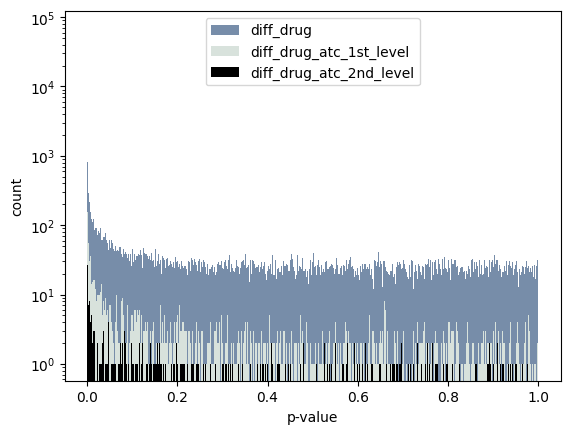

In [20]:
# see the distribution of p-values
plt.hist(switch_people_diff_drug["p_value"], color="#778da9", bins=10000)
plt.hist(switch_people_atc1st_diff_drug["p_value"], color="#d8e2dc", bins=10000)
plt.hist(switch_people_atc2nd_diff_drug["p_value"], color="black", bins=10000)
plt.yscale("log")
plt.legend(["diff_drug", "diff_drug_atc_1st_level", "diff_drug_atc_2nd_level"])
plt.xlabel("p-value")
plt.ylabel("count")
plt.show()


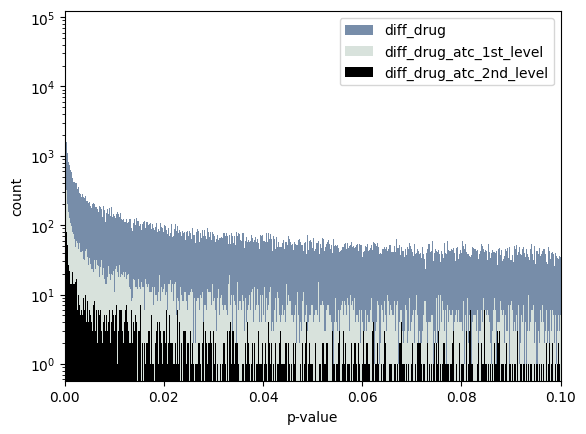

In [21]:
# only p-value bwtween 0 and 0.1
plt.hist(switch_people_diff_drug["p_value"], color="#778da9", bins=10000)
plt.hist(switch_people_atc1st_diff_drug["p_value"], color="#d8e2dc", bins=10000)
plt.hist(switch_people_atc2nd_diff_drug["p_value"], color="black", bins=10000)
plt.yscale("log")
plt.legend(["diff_drug", "diff_drug_atc_1st_level", "diff_drug_atc_2nd_level"])
plt.xlim(0, 0.1)
plt.xlabel("p-value")
plt.ylabel("count")
plt.show()

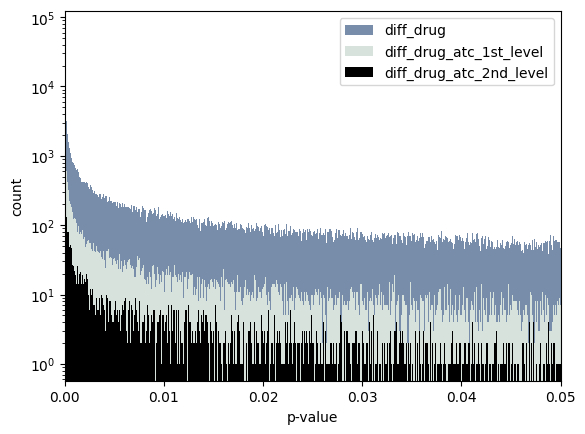

In [22]:
plt.hist(switch_people_diff_drug["p_value"], color="#778da9", bins=10000)
plt.hist(switch_people_atc1st_diff_drug["p_value"], color="#d8e2dc", bins=10000)
plt.hist(switch_people_atc2nd_diff_drug["p_value"], color="black", bins=10000)
plt.yscale("log")
plt.xlim(0, 0.05)
plt.xlabel("p-value")
plt.ylabel("count")
plt.legend(["diff_drug", "diff_drug_atc_1st_level", "diff_drug_atc_2nd_level"])
plt.show()

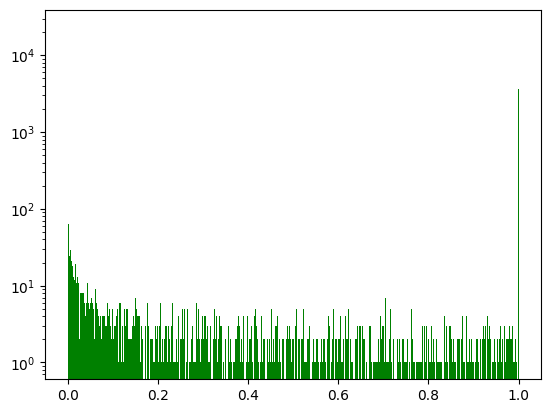

In [23]:
plt.hist(switch_people_atc1st_diff_drug["p_value"], color="green", bins=10000)
plt.yscale("log")
plt.show()


In [112]:
switch_people_diff_drug["p_value"].describe()

count    441566.000000
mean          0.447351
std           0.383915
min           0.000000
25%           0.041969
50%           0.391576
75%           0.840579
max           1.000000
Name: p_value, dtype: float64

In [113]:
switch_people_atc1st_diff_drug["p_value"].describe()

count    5.523800e+04
mean     2.128868e-01
std      3.330476e-01
min      0.000000e+00
25%      5.340948e-17
50%      3.194283e-03
75%      3.375118e-01
max      1.000000e+00
Name: p_value, dtype: float64

In [120]:
switch_people_atc2nd_diff_drug["p_value"].describe()

count     1.620600e+04
mean      1.371977e-01
std       2.868999e-01
min       0.000000e+00
25%      1.960996e-153
50%       1.100830e-13
75%       5.688150e-02
max       1.000000e+00
Name: p_value, dtype: float64

Proportion of p-values <= 0.05:
All Different Drugs:    25.98%
ATC code 1st Level:      60.23%
ATC code 2nd Level:      74.60%


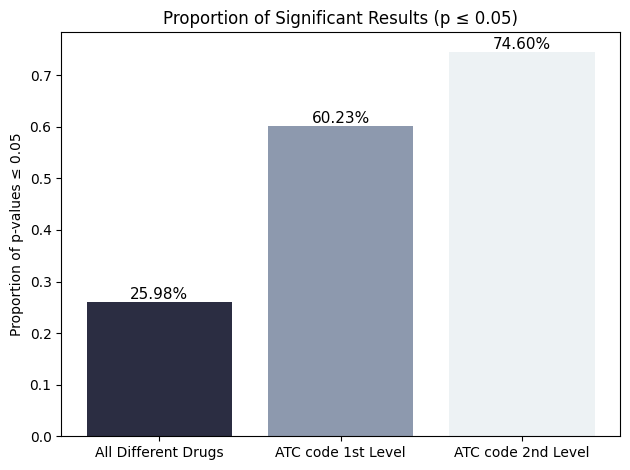

In [48]:
# Calculate the quantile for p-value = 0.05 in each distribution
quantile_diff_drug = (switch_people_diff_drug["p_value"] <= 0.05).mean()
quantile_atc1st = (switch_people_atc1st_diff_drug["p_value"] <= 0.05).mean()
quantile_atc2nd = (switch_people_atc2nd_diff_drug["p_value"] <= 0.05).mean()

# Print results in a formatted way
print("Proportion of p-values <= 0.05:")
print(f"All Different Drugs:    {quantile_diff_drug:.2%}")
print(f"ATC code 1st Level:      {quantile_atc1st:.2%}")
print(f"ATC code 2nd Level:      {quantile_atc2nd:.2%}")

# Create bar plot
bars = plt.bar(
    ["All Different Drugs", "ATC code 1st Level", "ATC code 2nd Level"],
    [quantile_diff_drug, quantile_atc1st, quantile_atc2nd],
    color=["#2b2d42", "#8d99ae", "#edf2f4"],
)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:.2%}",
        ha="center",
        va="bottom",
        fontsize=11,
    )

plt.ylabel("Proportion of p-values ≤ 0.05")
plt.title("Proportion of Significant Results (p ≤ 0.05)")
# plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [123]:
switch_people_atc2nd_diff_drug[switch_people_atc2nd_diff_drug["p_value"] == 1]


,A_drug_concept_id,A_atc_codes,A_drug_concept_name,B_drug_concept_id,B_atc_codes,B_drug_concept_name,people_count,avg_switch_interval,p_value
2501,1797513,"('J01MA02', 'S01AE03', 'S02AA15', 'S03AA07')",ciprofloxacin,903963,"('A01AC01', 'C05AA12', 'D07AB09', 'D07XB02', '...",triamcinolone,102,108.392523,1.0
2729,948582,"('A07AA05', 'J01XB02', 'S01AA18', 'S02AA11', '...",polymyxin B,907879,"('A01AB09', 'A07AC01', 'D01AC02', 'G01AF04', '...",miconazole,84,193.000000,1.0
2860,907879,"('A01AB09', 'A07AC01', 'D01AC02', 'G01AF04', '...",miconazole,948582,"('A07AA05', 'J01XB02', 'S01AA18', 'S02AA11', '...",polymyxin B,78,198.556962,1.0
3370,902427,"('C07AA06', 'S01ED01')",timolol,989878,"('C01BB01', 'C05AD01', 'D04AB01', 'N01BB02', '...",lidocaine,56,44.689189,1.0
3463,45892419,"('D06AX07', 'J01GB03', 'S01AA11', 'S02AA14', '...",gentamicin,1343916,"('A01AD01', 'B02BC09', 'C01CA24', 'R01AA14', '...",epinephrine,54,243.864407,1.0
...,...,...,...,...,...,...,...,...,...
16086,1343916,"('A01AD01', 'B02BC09', 'C01CA24', 'R01AA14', '...",epinephrine,19042445,"('R01AA09',)",tramazoline,1,41.000000,1.0
16100,1343916,"('A01AD01', 'B02BC09', 'C01CA24', 'R01AA14', '...",epinephrine,902722,"('J01GB01', 'S01AA12')",tobramycin,1,9.000000,1.0
16142,1367571,"('B01AB01', 'C05BA03', 'S01XA14')",heparin,920458,"('A07EA04', 'C05AA05', 'D07AC01', 'D07XC01', '...",betamethasone,1,14.000000,1.0
16157,1367571,"('B01AB01', 'C05BA03', 'S01XA14')",heparin,1124300,"('D11AX18', 'M01AB05', 'M02AA15', 'S01BC03')",diclofenac,1,12.000000,1.0
